#### To check the version of a library

In [85]:
import sys
print('python: {}'.format(sys.version))

import scipy
print('scipy: {}'.format(scipy.__version__))

import numpy as np
print('numpy: {}'.format(numpy.__version__))

import matplotlib.pyplot as plt
print('matplotlib: {}'.format(matplotlib.__version__))

import pandas as pd
print('pandas: {}'.format(pandas.__version__))

import sklearn
print('sklearn: {}'.format(sklearn.__version__))

python: 3.10.4 | packaged by conda-forge | (main, Mar 24 2022, 17:45:10) [Clang 12.0.1 ]
scipy: 1.7.3
numpy: 1.21.5
matplotlib: 3.5.1
pandas: 1.4.1
sklearn: 1.0.2


#### Import required libraries

In [86]:
from pandas.plotting import scatter_matrix
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

#### Loading iris dataset from sklearn ####

In [87]:
from sklearn import datasets

In [88]:
iris_dataset = datasets.load_iris()
print(list(iris_dataset))

['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module']


In [89]:
X = iris_dataset.data[:, :2]

In [90]:
X_count = len(X)
X_count

150

In [91]:
X_count = len(X.flat)
X_count

300

In [93]:
print(X.flat)
for x in X.flat:
    print(x)

5.1
3.5
4.9
3.0
4.7
3.2
4.6
3.1
5.0
3.6
5.4
3.9
4.6
3.4
5.0
3.4
4.4
2.9
4.9
3.1
5.4
3.7
4.8
3.4
4.8
3.0
4.3
3.0
5.8
4.0
5.7
4.4
5.4
3.9
5.1
3.5
5.7
3.8
5.1
3.8
5.4
3.4
5.1
3.7
4.6
3.6
5.1
3.3
4.8
3.4
5.0
3.0
5.0
3.4
5.2
3.5
5.2
3.4
4.7
3.2
4.8
3.1
5.4
3.4
5.2
4.1
5.5
4.2
4.9
3.1
5.0
3.2
5.5
3.5
4.9
3.6
4.4
3.0
5.1
3.4
5.0
3.5
4.5
2.3
4.4
3.2
5.0
3.5
5.1
3.8
4.8
3.0
5.1
3.8
4.6
3.2
5.3
3.7
5.0
3.3
7.0
3.2
6.4
3.2
6.9
3.1
5.5
2.3
6.5
2.8
5.7
2.8
6.3
3.3
4.9
2.4
6.6
2.9
5.2
2.7
5.0
2.0
5.9
3.0
6.0
2.2
6.1
2.9
5.6
2.9
6.7
3.1
5.6
3.0
5.8
2.7
6.2
2.2
5.6
2.5
5.9
3.2
6.1
2.8
6.3
2.5
6.1
2.8
6.4
2.9
6.6
3.0
6.8
2.8
6.7
3.0
6.0
2.9
5.7
2.6
5.5
2.4
5.5
2.4
5.8
2.7
6.0
2.7
5.4
3.0
6.0
3.4
6.7
3.1
6.3
2.3
5.6
3.0
5.5
2.5
5.5
2.6
6.1
3.0
5.8
2.6
5.0
2.3
5.6
2.7
5.7
3.0
5.7
2.9
6.2
2.9
5.1
2.5
5.7
2.8
6.3
3.3
5.8
2.7
7.1
3.0
6.3
2.9
6.5
3.0
7.6
3.0
4.9
2.5
7.3
2.9
6.7
2.5
7.2
3.6
6.5
3.2
6.4
2.7
6.8
3.0
5.7
2.5
5.8
2.8
6.4
3.2
6.5
3.0
7.7
3.8
7.7
2.6
6.0
2.2
6.9
3.2
5.6
2.8
7.7
2.8
6.3
2.7
6.7
3.3


In [94]:
x_min = X[:, 0].min()
print(x_min)

4.3


In [95]:
print(x_min - .5)

3.8


In [96]:
x_max = X[:, 0].max()
print(x_max)
print(x_max + .5)

7.9
8.4


In [97]:
x_mean = X[:, 0].mean()
print(x_mean)

5.843333333333334


##### Converting sklearn iris dataset to pandas dataframe

In [98]:
iris_df = pd.DataFrame(data=iris_dataset.data, columns=iris_dataset.feature_names)
iris_df['target'] = iris_dataset.target
iris_df['target_class'] = iris_df['target'].replace([0, 1, 2], 
                          ['Iris-' + species for species in iris_dataset['target_names'].tolist()])
iris_df.shape

(150, 6)

In [99]:
print(list(iris_df))

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'target', 'target_class']


In [100]:
iris_df.drop('target', axis=1, inplace=True)
print(iris_df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  target_class  
0  Iris-setosa  
1  Iris-setosa  
2  Iris-setosa  
3  Iris-setosa  
4  Iris-setosa  


#### Otherwise use seaborn data sets which are actual pandas data frames:

import seaborn
iris = seaborn.load_dataset("iris")
type(iris)
<class 'pandas.core.frame.DataFrame'> ####

In [101]:
print(iris_df.describe().round(2))

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count             150.00            150.00             150.00   
mean                5.84              3.06               3.76   
std                 0.83              0.44               1.77   
min                 4.30              2.00               1.00   
25%                 5.10              2.80               1.60   
50%                 5.80              3.00               4.35   
75%                 6.40              3.30               5.10   
max                 7.90              4.40               6.90   

       petal width (cm)  
count            150.00  
mean               1.20  
std                0.76  
min                0.10  
25%                0.30  
50%                1.30  
75%                1.80  
max                2.50  


In [102]:
print(iris_df.groupby('target_class').size())

target_class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


#### Univariate plot - to better understand about each attribute

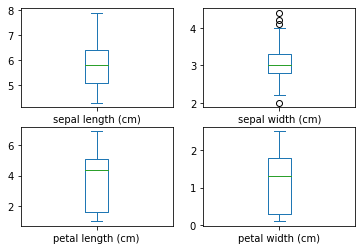

In [103]:
## Given that input variables are numeric, can create box and whisker plot
iris_df.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

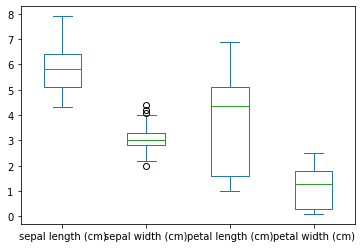

In [104]:
## Given that input variables are numeric, can create box and whisker plot
iris_df.plot(kind='box', layout=(2,2), sharex=False, sharey=False)
plt.show()

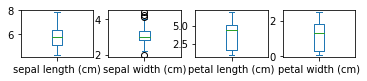

In [105]:
## Given that input variables are numeric, can create box and whisker plot
iris_df.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False)
plt.show()

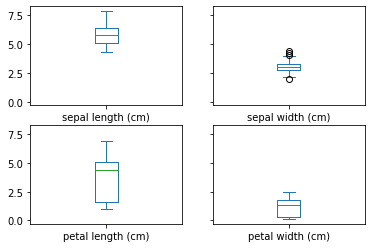

In [106]:
## Given that input variables are numeric, can create box and whisker plot
iris_df.plot(kind='box', subplots=True, layout=(2,2), sharex=True, sharey=True)
plt.show()

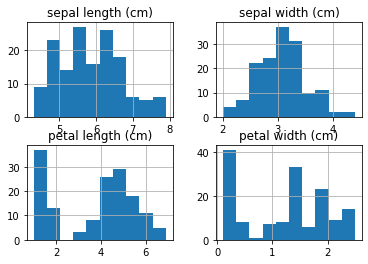

In [107]:
iris_df.hist()
plt.show()
## 2

#### Multivariate plot - to better understand about relationship between different attributes.
#### Can be helpful to spot structured relationships between input variables 

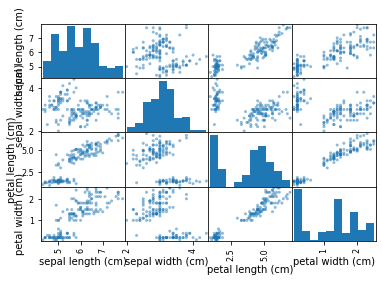

In [108]:
scatter_matrix(iris_df)
plt.show()

# diagonal grouping of some pairs - some of them suggest high correlation and a predictable relationship 

#### Create some algorithm (model the data) and estimate their accuracy based on some unseen data

In [109]:
## Create a training and validation dataset
array = iris_df.values
X = array[:, 0:4]
Y = array[:, 4]

validation_size = 0.20

# seed helps to maintain the same randomness in training and testing datasets
seed = 6

X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size = validation_size, random_state=seed)

## Create a test harness: 10 fold cv to estimate accuracy
seed = 6
# using the metric of accuracy to evaluate the model.
# Accuracy = (number of correct predictions/total predictions) * 100
scoring = 'accuracy'

In [110]:
## Build Algorithms
# Use the same seed for every algorithm --> ensures that algo efficiency
# is compared and evaluated against the same dataset

models = []

'''
linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

https://stackoverflow.com/questions/62658215/convergencewarning-lbfgs-failed-to-converge-status-1-stop-total-no-of-iter

lbfgs stand for: "Limited-memory Broyden–Fletcher–Goldfarb–Shanno Algorithm". It is one of the solvers' algorithms 
provided by Scikit-Learn Library.

The term limited-memory simply means it stores only a few vectors that represent the gradients approximation 
implicitly. It has better convergence on relatively small datasets.

So had to change max itertions of log reg to 400 from 100

But what is algorithm convergence?

In simple words. If the error of solving is ranging within very small range (i.e., it is almost not changing), 
then that means the algorithm reached the solution (not necessary to be the best solution as it might be stuck at 
what so-called "local Optima").

On the other hand, if the error is varying noticeably (even if the error is relatively small [like in your case the 
score was good], but rather the differences between the errors per iteration is greater than some tolerance) then 
we say the algorithm did not converge.

Now, you need to know that Scikit-Learn API sometimes provides the user the option to specify the maximum number of 
iterations the algorithm should take while it's searching for the solution in an iterative manner:

'''
models.append(('LR', LogisticRegression(max_iter=400)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Evaluate each model
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.958333 (0.041667)
LDA: 0.975000 (0.038188)
KNN: 0.958333 (0.041667)
DTC: 0.958333 (0.041667)
NB: 0.966667 (0.040825)
SVM: 0.941667 (0.053359)


In [124]:
### LDA performed better among all
### test the model with test data
lda_model = LinearDiscriminantAnalysis()

lda_model.fit(X_train, Y_train)
Y_pred = lda_model.predict(X_test)

In [130]:
## get some metrics
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
print('Accuracy ' + str(accuracy_score(Y_test, Y_pred)))
print(classification_report(Y_test, Y_pred))

[[ 9  0  0]
 [ 0 10  0]
 [ 0  0 11]]
Accuracy 1.0
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

